In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
dataset=load_breast_cancer()

In [5]:
print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df=pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
df["diagnosis"]=dataset["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.diagnosis.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

From the discription of dataset, 1 is classified as Benign and 0 as Malignant

In [9]:
#Spliting to trainset and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dataset["data"],dataset["target"],test_size=0.3,random_state=3)

In [10]:
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


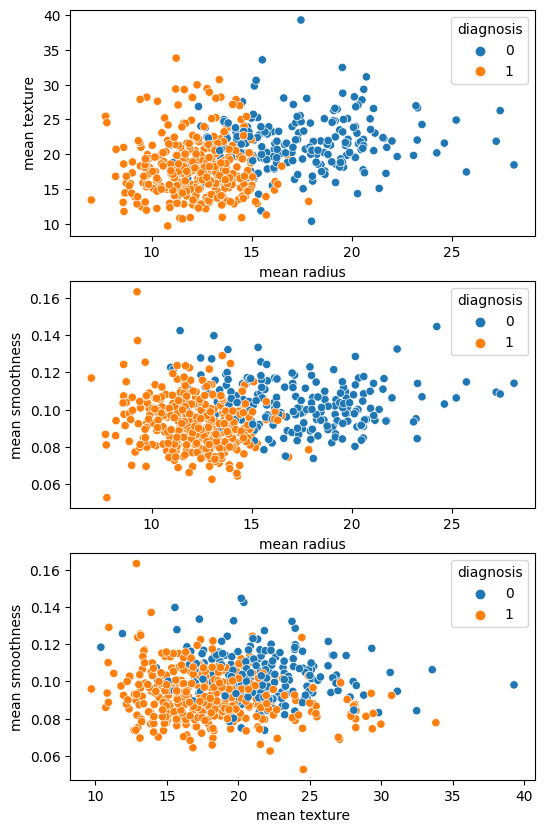

In [11]:
fig,axes=plt.subplots(3,1,figsize=(6,10))
sb.scatterplot(ax=axes[0],x="mean radius",y="mean texture",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[1],x="mean radius",y="mean smoothness",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[2],x="mean texture",y="mean smoothness",data=df,hue="diagnosis")
plt.show()

# Plots In 3d

Text(0.5, 0.5, 'Mean Smoothness')

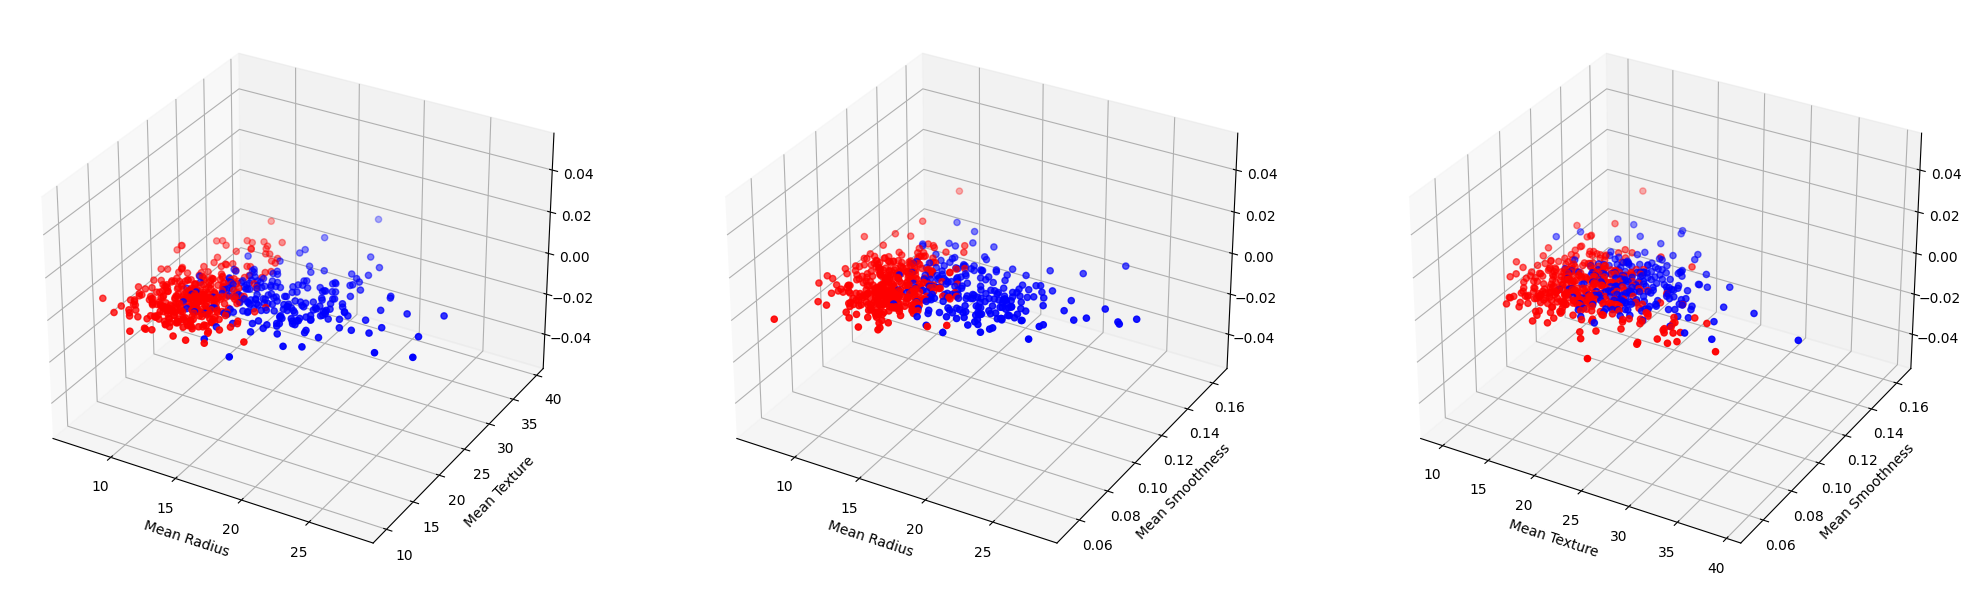

In [20]:
from mpl_toolkits.mplot3d import Axes3D
huemap={1:'r',0:'b'}# color redis B and color Blue is M
fig, ax = plt.subplots(1,3,figsize=(25,25),subplot_kw=dict(projection='3d'))
ax[0].scatter3D(df['mean radius'].values,df["mean texture"],c=df["diagnosis"].map(huemap))
ax[0].set_xlabel("Mean Radius")
ax[0].set_ylabel("Mean Texture")
ax[1].scatter3D(df['mean radius'].values,df["mean smoothness"],c=df["diagnosis"].map(huemap))
ax[1].set_xlabel("Mean Radius")
ax[1].set_ylabel("Mean Smoothness")
ax[2].scatter3D(df["mean texture"].values,df["mean smoothness"],c=df["diagnosis"].map(huemap))
ax[2].set_xlabel("Mean Texture")
ax[2].set_ylabel("Mean Smoothness")